* Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает
* Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [2]:
# Наименования классов
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
# установка параметров нейросети

batch_size = 256 # размер батча
num_classes = 10 # количество предсказываемых классов
epochs = 5 # число эпох обучения
num_predictions = 20 
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#Стандартизация
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


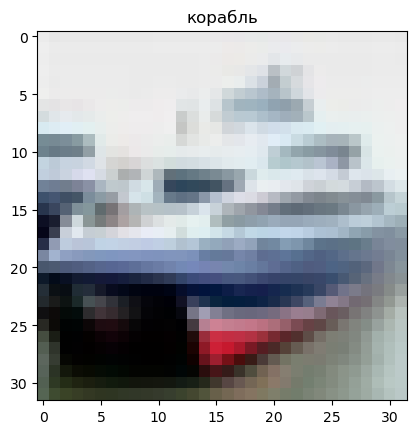

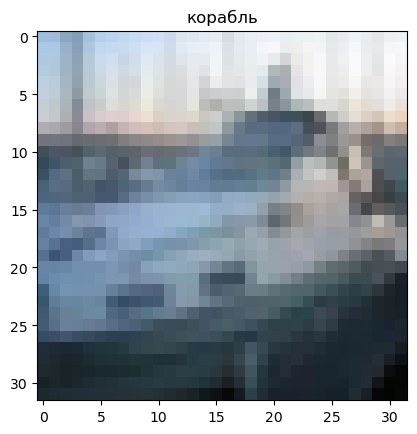

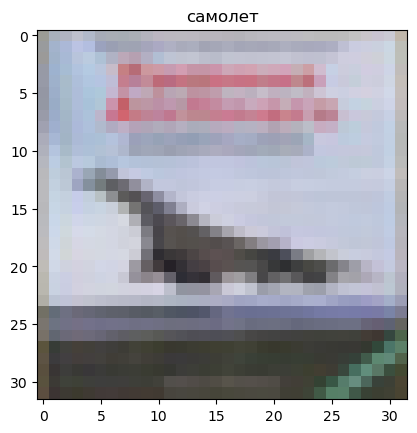

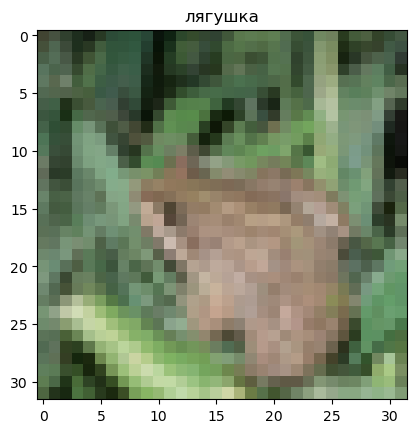

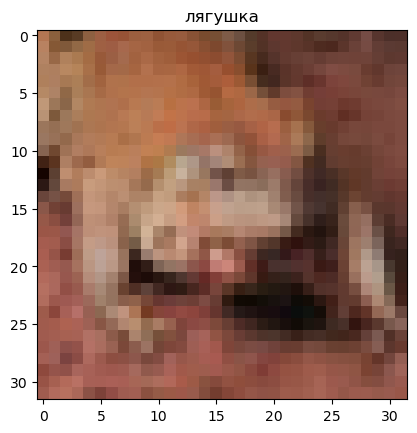

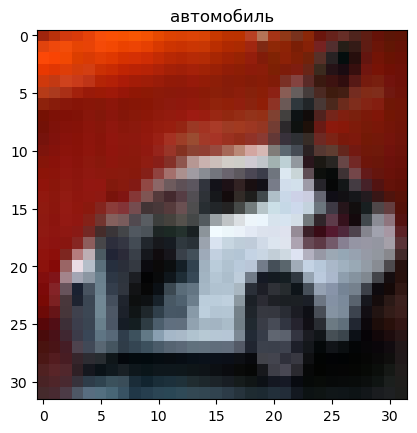

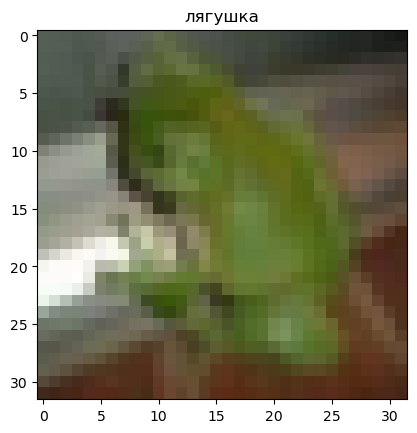

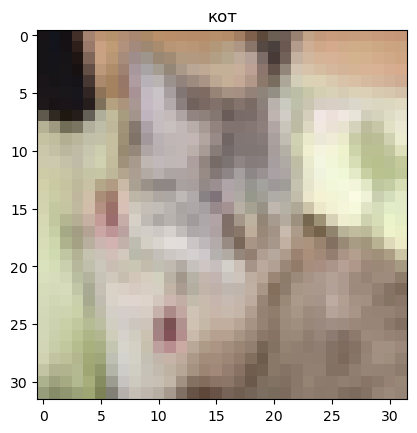

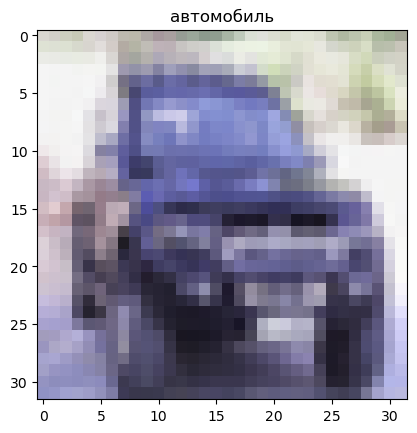

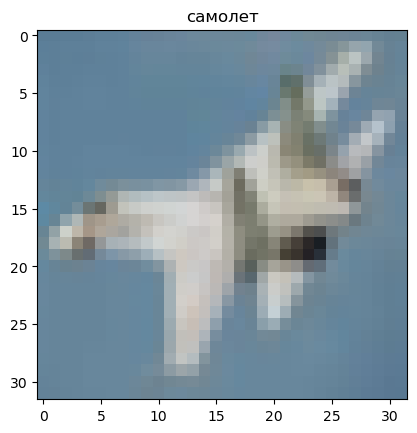

In [4]:
# Первые десять примедов снимков датасета
for i in np.arange(1, 11, 1):  
    plt.imshow(X_test[i])
    plt.title(classes[np.argmax(y_test[i,:])])
    plt.show()

Настроку ширины и глубины сети будем проводить таким образом, чтобы общее количество настраиваемых параметров оставалось приблизительно одинаковым для каждой сети

In [5]:
# конфигурирование слоев нейросети
model1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(48, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()
# компиляция модели
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                        

In [6]:
# обучение модели
history1 = model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 21s 86ms/step - loss: 1.7051 - accuracy: 0.3736 - val_loss: 1.4181 - val_accuracy: 0.4926
Epoch 2/5
196/196 [==============================] - 16s 81ms/step - loss: 1.2817 - accuracy: 0.5402 - val_loss: 1.1230 - val_accuracy: 0.6074
Epoch 3/5
196/196 [==============================] - 16s 80ms/step - loss: 1.0853 - accuracy: 0.6148 - val_loss: 0.9777 - val_accuracy: 0.6525
Epoch 4/5
196/196 [==============================] - 19s 97ms/step - loss: 0.9516 - accuracy: 0.6660 - val_loss: 0.8726 - val_accuracy: 0.6972
Epoch 5/5
196/196 [==============================] - 15s 78ms/step - loss: 0.8574 - accuracy: 0.6990 - val_loss: 0.7988 - val_accuracy: 0.7238


In [7]:
# проверка работы обученной модели
scores = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.7988 - accuracy: 0.7238
Test loss: 0.7988463044166565
Test accuracy: 0.723800003528595


In [8]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_6 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [9]:
# обучение модели
model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 24s 114ms/step - loss: 1.6676 - accuracy: 0.3861 - val_loss: 1.2953 - val_accuracy: 0.5266
Epoch 2/5
196/196 [==============================] - 19s 99ms/step - loss: 1.2319 - accuracy: 0.5604 - val_loss: 1.0634 - val_accuracy: 0.6245
Epoch 3/5
196/196 [==============================] - 20s 100ms/step - loss: 1.0331 - accuracy: 0.6369 - val_loss: 0.9065 - val_accuracy: 0.6886
Epoch 4/5
196/196 [==============================] - 19s 96ms/step - loss: 0.9013 - accuracy: 0.6804 - val_loss: 0.7844 - val_accuracy: 0.7278
Epoch 5/5
196/196 [==============================] - 20s 103ms/step - loss: 0.7893 - accuracy: 0.7250 - val_loss: 0.7467 - val_accuracy: 0.7370


In [10]:
# проверка работы обученной модели
scores = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.7988 - accuracy: 0.7238
Test loss: 0.7988463044166565
Test accuracy: 0.723800003528595
313/313 [==============================] - 4s 11ms/step - loss: 0.7467 - accuracy: 0.7370
Test loss: 0.7466692924499512
Test accuracy: 0.7369999885559082


In [4]:
# конфигурирование слоев нейросети
model3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model3.add(Conv2D(128, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(128, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(128, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(120, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# полносвязные слои нейронной сети
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.summary()
# компиляция модели
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                        

In [5]:
# обучение модели
model3.fit(X_train, y_train,
          batch_size=128,
          epochs=epochs,
          validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 46s 102ms/step - loss: 1.7282 - accuracy: 0.3546 - val_loss: 1.3027 - val_accuracy: 0.5264
Epoch 2/5
391/391 [==============================] - 39s 100ms/step - loss: 1.1925 - accuracy: 0.5705 - val_loss: 1.0220 - val_accuracy: 0.6384
Epoch 3/5
391/391 [==============================] - 37s 96ms/step - loss: 0.9762 - accuracy: 0.6549 - val_loss: 0.8862 - val_accuracy: 0.6921
Epoch 4/5
391/391 [==============================] - 38s 97ms/step - loss: 0.8315 - accuracy: 0.7096 - val_loss: 0.7383 - val_accuracy: 0.7483
Epoch 5/5
391/391 [==============================] - 38s 96ms/step - loss: 0.7436 - accuracy: 0.7429 - val_loss: 0.6752 - val_accuracy: 0.7728


In [7]:
# проверка работы обученной модели
scores = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 5s 13ms/step - loss: 0.6752 - accuracy: 0.7728
Test loss: 0.6751848459243774
Test accuracy: 0.7728000283241272


Выводы:
* при увеличении ширины модели (большее число настраиваемых параметров) значение метрики модели растёт
* при увеличении глубины модели (большее число слоёв) значение метрики модели также увеличичвается
* при увеличении глубины и ширины сети значительно возрастает время обучения модели
* необходимо подбирать оптимальное значение гиперпараметров для достижения наилучшего результата